# DSCI-508 Project 6 - Graph Coding Assignment
### Matt Snyder

In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Load dataframe from file

In [2]:
df = pd.read_csv('mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Stacked Histogram

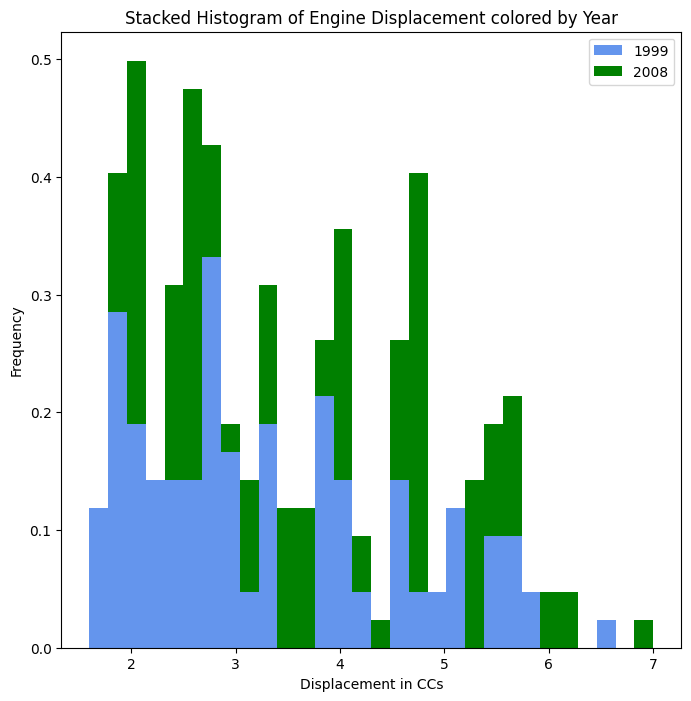

In [111]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

colors = ['cornflowerblue', 'green'] # would need more if we had more years in data

# for stacked histogram, need array of 2 arrays, one for each year.  
# The inner arrays will each have 234 members: the displacement numbers
years = sorted(df['year'].unique()) # years as integers
outer_array = [] # will have one member per year
for year in years:
    sel = df.loc[:, 'year'] == year
    inner_array = df.loc[sel, 'displ'].values # displacement values for this year
    outer_array.append(inner_array)

# add plot to figure
n, bins, patches = ax.hist(outer_array, bins = 30, stacked = True, density = True, color=colors, label=years)

# add title, axis labels, and legend
plt.legend(loc="upper right")
plt.title("Stacked Histogram of Engine Displacement colored by Year")
plt.ylabel('Frequency')
plt.xlabel('Displacement in CCs')

plt.show()

## Violin Plot

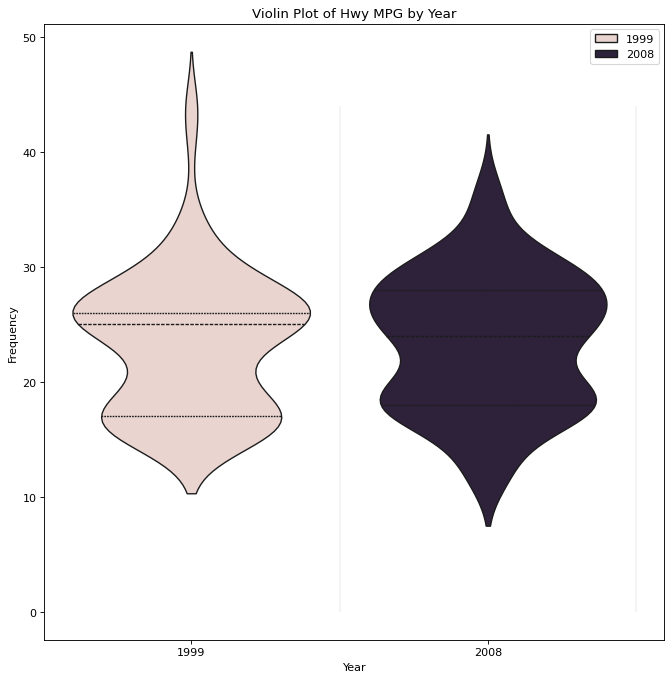

In [107]:
plt.figure(figsize = (10, 10), dpi= 80)
sns.violinplot(x = "year", 
               y = "hwy", 
               data = df, 
               density_norm = 'width', 
               inner = 'quartile',
               hue = "year"
              )

# add vertical dividers
ax = plt.gca()
xticks = ax.get_xticks()
for tick in xticks:
    ax.vlines(tick + 0.5, 0, np.max(df["hwy"]), color = "grey", alpha = .1)

# add title, axis labels, and legend
plt.legend(loc="upper right")
plt.title("Violin Plot of Hwy MPG by Year")
plt.ylabel('Frequency')
plt.xlabel('Year')

plt.show()

## Scatter Plot

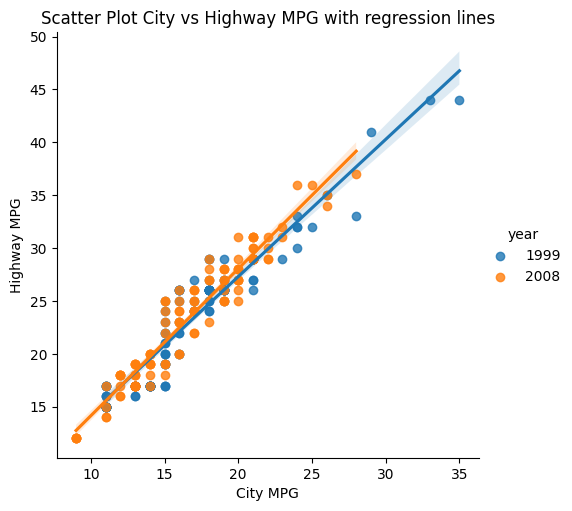

In [116]:
sns.lmplot(x="cty", y="hwy", data=df, hue = "year")

# add title, axis labels
plt.title("Scatter Plot City vs Highway MPG with regression lines")
plt.ylabel('Highway MPG')
plt.xlabel('City MPG')

plt.show()

**********

## Appendix: Stacked Bar instead of Histogram

Before I found the histogram example, I attempted this with a stacked bar, and I wanted to save it for reference

### Encode the year as numeric columns

In [47]:
year_df = df[['year']] # single column datafram
year_labels = sorted(year_df['year'].unique()) # years as integers
year_labels = [f'{y}' for y in year_labels] # years as strings

# encoder produces numpy array
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(year_df)
year_enc = encoder.transform(year_df) 

# convert array to datafram
year_enc_df = pd.DataFrame(year_enc.astype('int')) 
year_enc_df.columns = year_labels

# add encoded dataframe to main dataframe
df_enc = pd.concat([df, year_enc_df], axis=1)
df_enc.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,1999,2008
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1,0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,1,0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0,1
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0,1
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1,0


### Group by displacement, then aggregate counts of encoded years

In [39]:
columns = ['displ'] + year_labels
df_grouped = df_enc.loc[:, columns].groupby('displ').sum()
df_grouped.head()

,1999,2008
displ,,
1.6,5,0
1.8,9,5
1.9,3,0
2.0,8,13
2.2,6,0


### Create Stacked Bar Plot

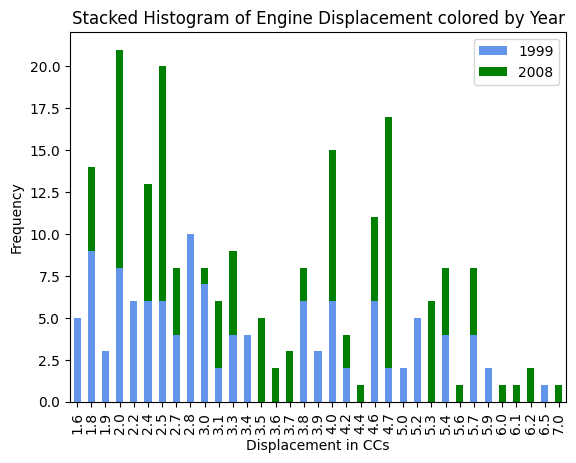

In [110]:
# basic plot from pandas
df_grouped.plot(kind='bar', stacked=True, color=['cornflowerblue', 'green']) 

# add title and axes labels using matplotlib
plt.title('Stacked Histogram of Engine Displacement colored by Year')
plt.ylabel('Frequency')
plt.xlabel('Displacement in CCs')

plt.show()